In [1]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING DECISION TREE
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [2]:
#load your heart disease dataset
df.head shows first 5 rows
df = pd.read_csv(r"C:\Users\kamir\slk projects\Logistic Regression\heart_cleveland_upload-checkpoint.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()
df.isnull().sum()
df.describe()
df.columns


#df.info()-->shows how many rows,columns, data types
#df.columns--->print all column names
#it help us to understand dataset structure correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [4]:
X = df.drop("condition", axis=1)
y = df["condition"]
# x contains all input columns(age,sex,cp,bp....ect)
# y  contain output columns (condition =0 or 1)

In [6]:
#we are splitting the data into training and testing processs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (237, 13) (237,)
Test shapes: (60, 13) (60,)


In [7]:
"""
Creates a decision tree model

dt.fit() learns patterns from training data

The model creates decision rules like:

If age > 50

If cholesterol high

If chest pain severe

etc.


"""

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision Tree Accuracy: 0.7666666666666667


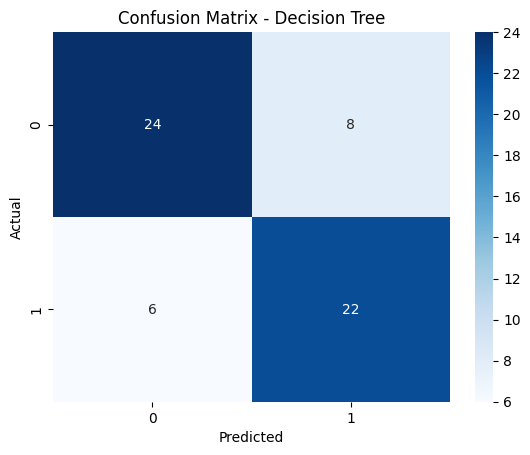


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [8]:
#compares predicted values with actual values
#accuracy = coreetly predicted/total predictions
# the accuracy i got 0.76%

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [9]:
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

sample_df = pd.DataFrame([sample])
result = dt.predict(sample_df)[0]

print("Prediction:", "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")


Prediction: Heart Disease (1)
